# [3920] Exploratory Data Analysis
Data file:
* Data: ● [diabetes_health_indicators_100K.csv
](https://docs.google.com/spreadsheets/d/13ka35JTeNaOJCzY36WDxNZoEJQ3BSn1_tOJL9aXHnK8/edit?usp=sharing)

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [5]:
# Read data file (student_lifestyle.csv) into a dataframe
#  Default field separator is ','
df = pd.read_csv('/content/diabetes_health_indicators_100K.csv')

In [6]:
# Display shape of dataframe
df.shape

(100000, 24)

In [7]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head(), "\n")

First 5 rows of the dataset:
   Patient ID  Hospital ID Have_Diabetes High_BP High_Chol Chol_Checked   BMI  \
0      756192        22376            NO       Y        No          Yes  26.0   
1      434725        64100            NO       Y        No           No  34.0   
2      711664        39437            NO       N        No          Yes  26.0   
3      846105        92451            NO       N        No           No  23.0   
4      769580        18727            NO       N        No          Yes  25.0   

  Smoker Had_Stroke Have_Heart_Disease  ... Have_Health_Insurance  \
0     no         no                 no  ...                   yes   
1     no         no                 no  ...                   yes   
2     no         no                 no  ...                   yes   
3    yes         no                 no  ...                   yes   
4     no         no                 no  ...                   yes   

  Skipped_Doctor_Due_To_Cost General_Health_State Mental_Health_State

In [8]:
# Display DataFrame information
print("DataFrame info:")
df.info()
print("\n")


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Patient ID                  100000 non-null  int64  
 1   Hospital ID                 100000 non-null  int64  
 2   Have_Diabetes               100000 non-null  object 
 3   High_BP                     99434 non-null   object 
 4   High_Chol                   99637 non-null   object 
 5   Chol_Checked                100000 non-null  object 
 6   BMI                         99843 non-null   float64
 7   Smoker                      99807 non-null   object 
 8   Had_Stroke                  100000 non-null  object 
 9   Have_Heart_Disease          100000 non-null  object 
 10  Physically_Active           100000 non-null  object 
 11  Eat_Fruits                  99883 non-null   object 
 12  Eat_Veggies                 99920 non-null   object 
 13 

In [9]:
# Summary statistics for numeric columns (e.g., BMI)
print("Summary statistics for numeric columns:")
print(df.describe())
print("\n")

Summary statistics for numeric columns:
          Patient ID    Hospital ID           BMI  Mental_Health_State  \
count  100000.000000  100000.000000  99843.000000         99920.000000   
mean   500259.750810   53719.270010     28.108160             3.086599   
std    230745.139824   24617.395616      6.458825             7.281592   
min    100002.000000   13391.000000     12.000000             0.000000   
25%    300314.500000   38684.000000     24.000000             0.000000   
50%    501873.000000   53219.000000     27.000000             0.000000   
75%    699999.250000   75673.000000     31.000000             2.000000   
max    899989.000000   92451.000000     98.000000            30.000000   

       Physical_Health_State  
count           99864.000000  
mean                3.941160  
std                 8.413652  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 3.000000  
max                30.000000  




In [10]:
# Summary for categorical columns (excluding ID columns)
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' and col not in ['Patient ID', 'Hospital ID']]
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for Have_Diabetes:
Have_Diabetes
NO     91412
YES     8588
Name: count, dtype: int64


Value counts for High_BP:
High_BP
N    59447
Y    39987
Name: count, dtype: int64


Value counts for High_Chol:
High_Chol
No     59213
Yes    40424
Name: count, dtype: int64


Value counts for Chol_Checked:
Chol_Checked
Yes    96056
No      3944
Name: count, dtype: int64


Value counts for Smoker:
Smoker
no     56284
yes    43523
Name: count, dtype: int64


Value counts for Had_Stroke:
Had_Stroke
no     96309
yes     3691
Name: count, dtype: int64


Value counts for Have_Heart_Disease:
Have_Heart_Disease
no     91473
yes     8527
Name: count, dtype: int64


Value counts for Physically_Active:
Physically_Active
yes    76629
no     23371
Name: count, dtype: int64


Value counts for Eat_Fruits:
Eat_Fruits
yes    63765
no     36118
Name: count, dtype: int64


Value counts for Eat_Veggies:
Eat_Veggies
yes    81508
no     18412
Name: count, dtype: int64


Value counts for Heavy_Drinker:
Heavy_

In [11]:
# Check for missing values in the dataset
print("Missing values per column:")
print(df.isnull().sum(), "\n")

Missing values per column:
Patient ID                      0
Hospital ID                     0
Have_Diabetes                   0
High_BP                       566
High_Chol                     363
Chol_Checked                    0
BMI                           157
Smoker                        193
Had_Stroke                      0
Have_Heart_Disease              0
Physically_Active               0
Eat_Fruits                    117
Eat_Veggies                    80
Heavy_Drinker                   0
Have_Health_Insurance           0
Skipped_Doctor_Due_To_Cost      0
General_Health_State            0
Mental_Health_State            80
Physical_Health_State         136
Difficulty_Walking            183
Gender                          0
Age                           157
Education_Level               418
Income_Range                  438
dtype: int64 



## **VISUALIZATIONS**

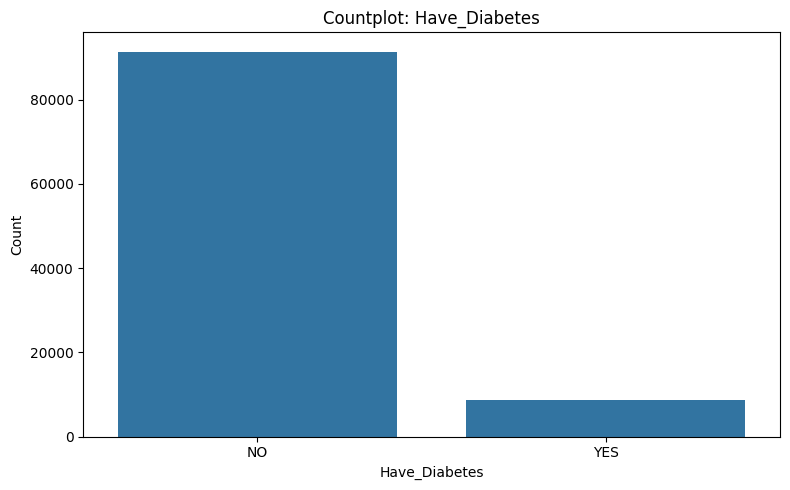

In [12]:
# 1. Countplot for the binary variable 'Have_Diabetes'
plt.figure(figsize=(8, 5))
sns.countplot(x="Have_Diabetes", data=df)
plt.title("Countplot: Have_Diabetes")
plt.xlabel("Have_Diabetes")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


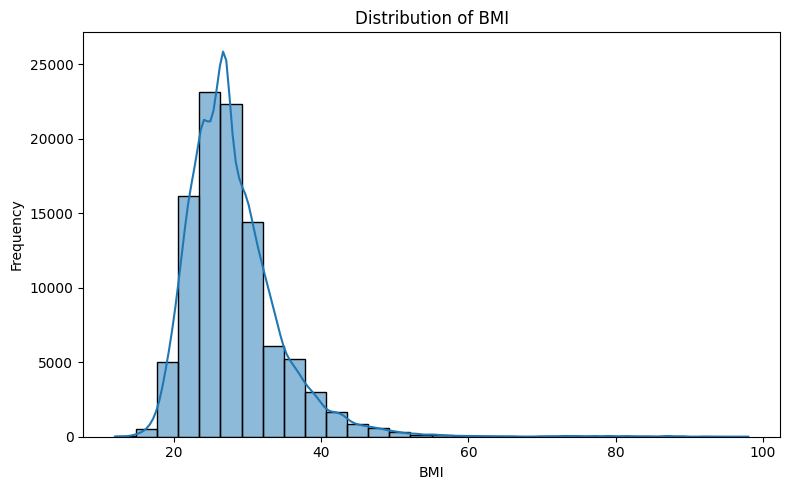

In [13]:
# 2. Distribution of BMI
plt.figure(figsize=(8, 5))
sns.histplot(df["BMI"], kde=True, bins=30)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

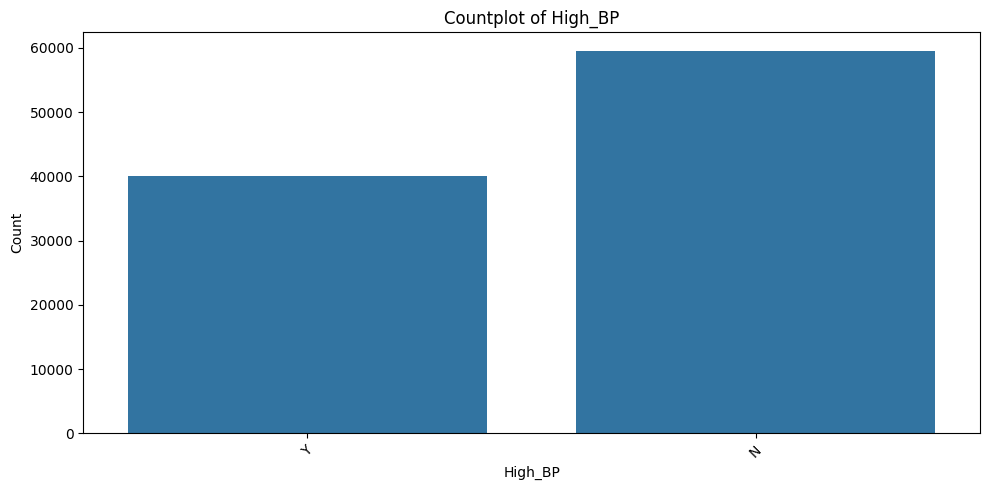

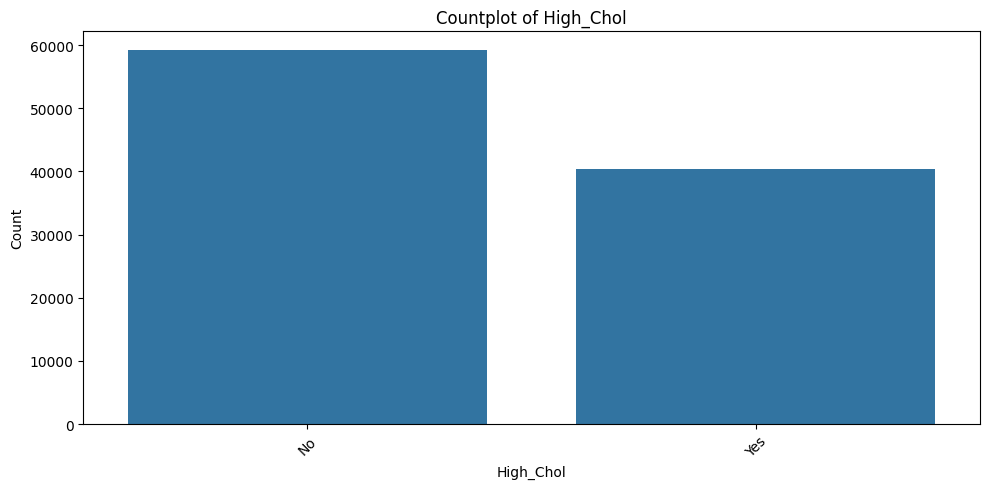

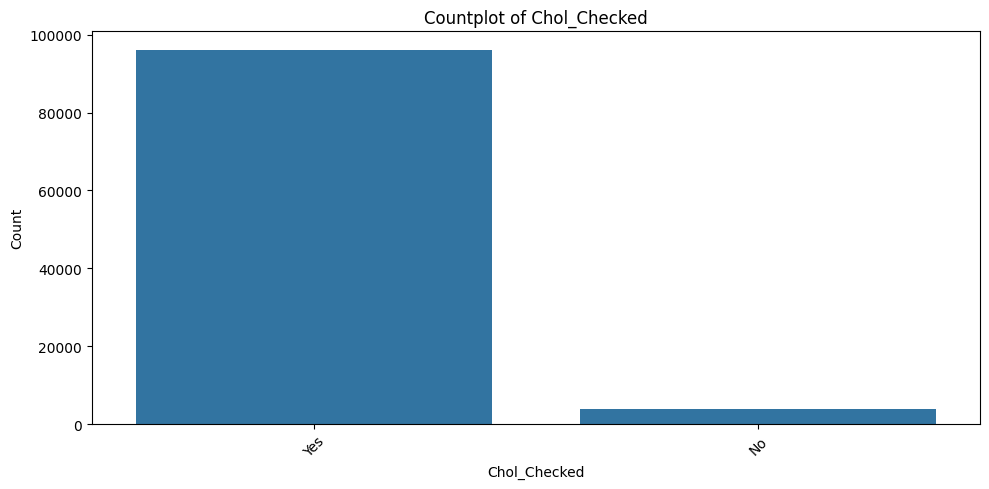

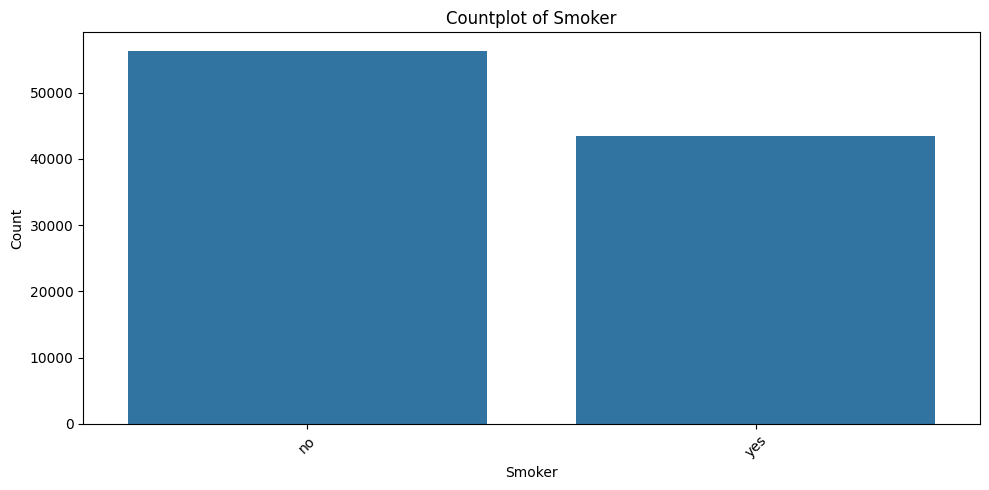

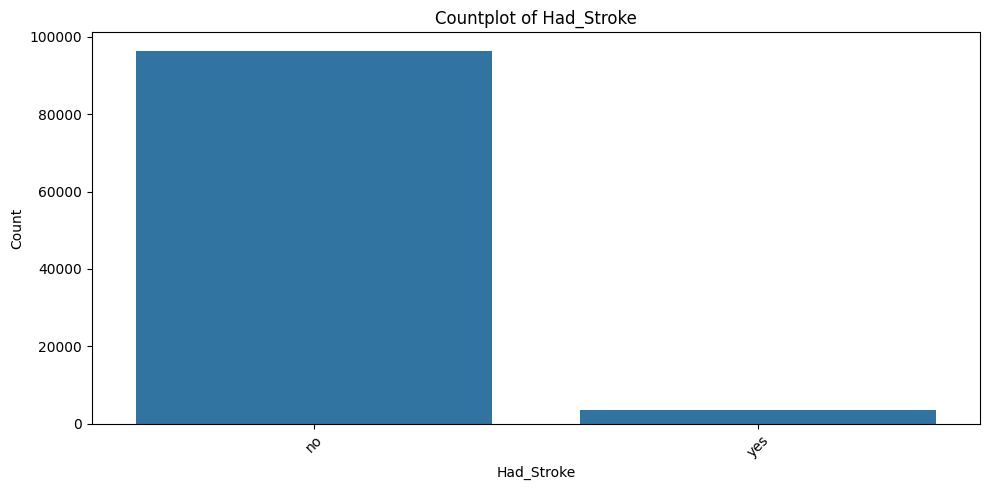

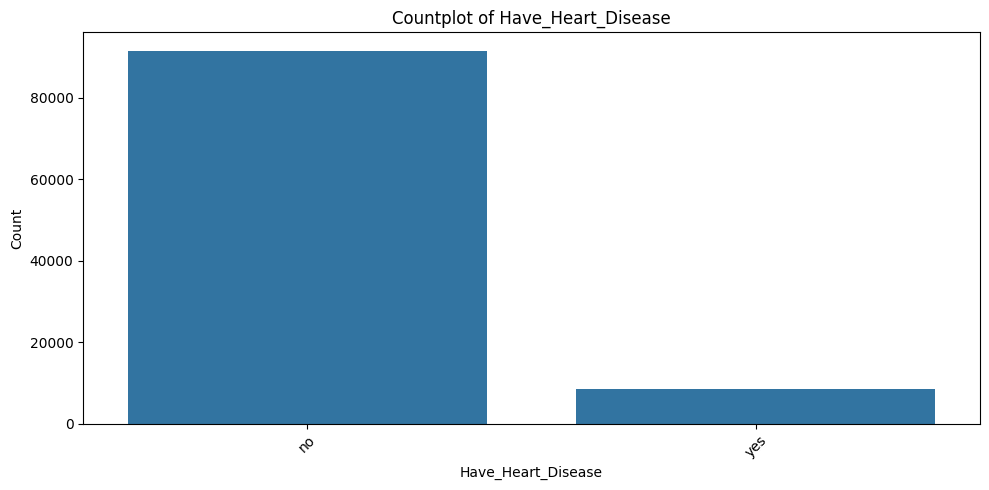

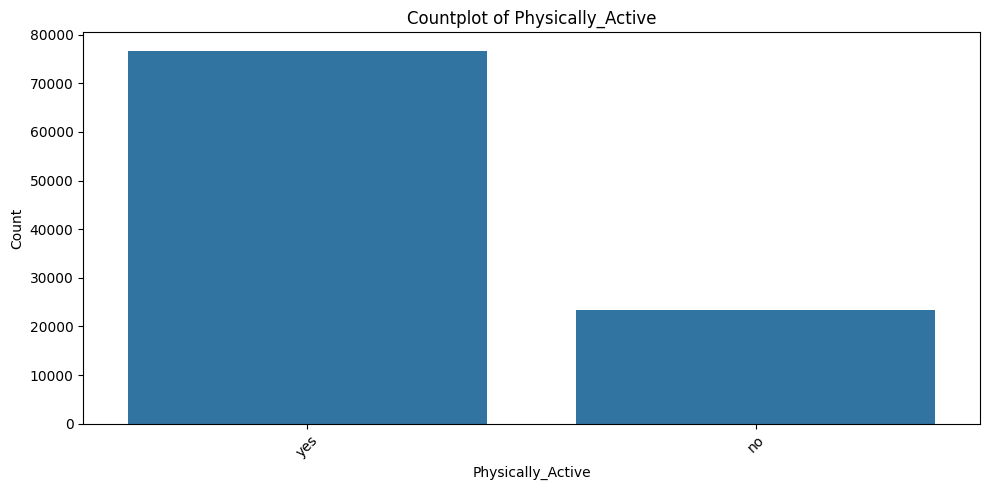

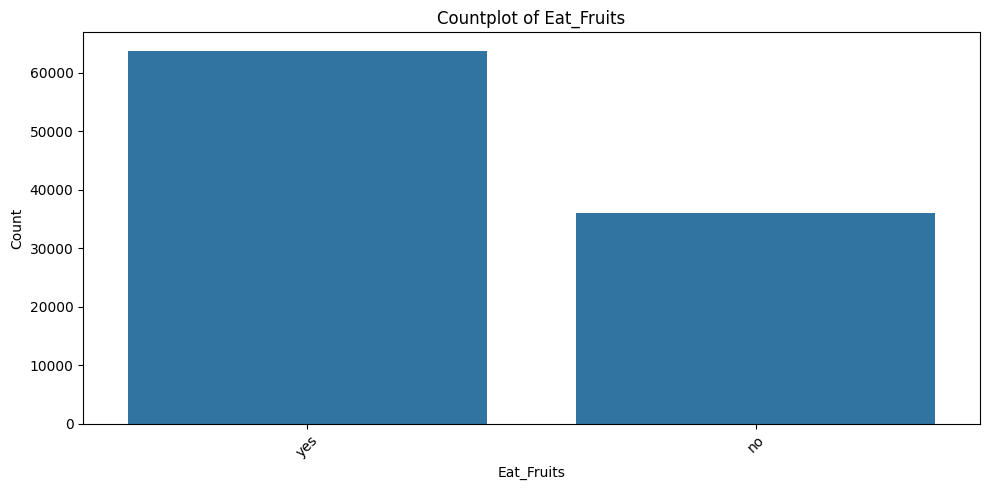

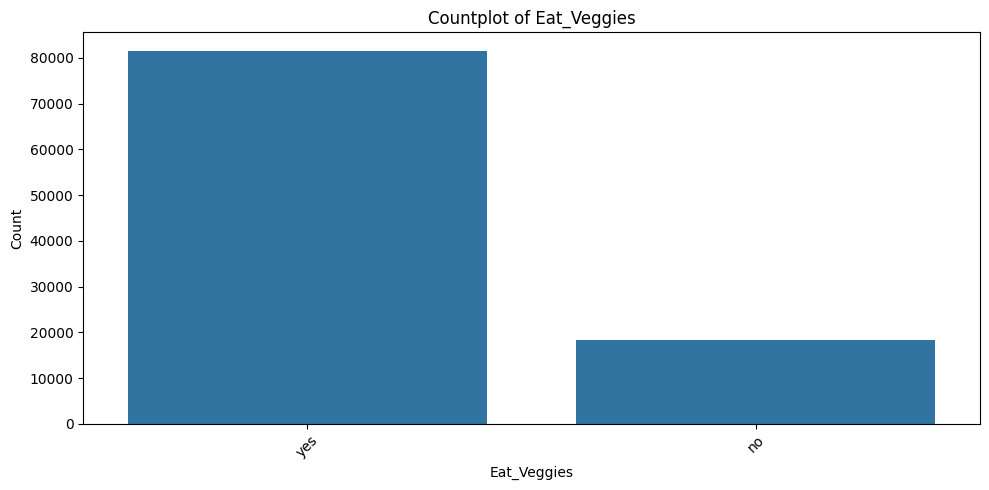

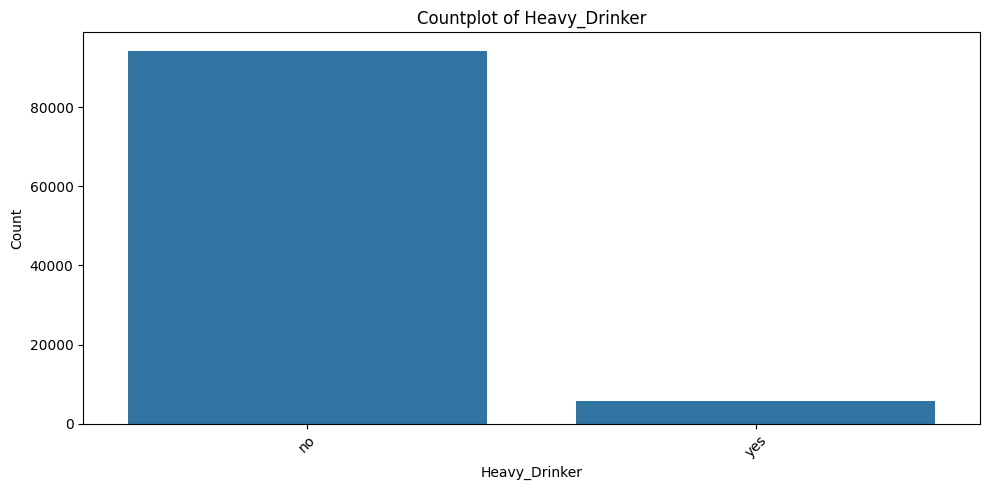

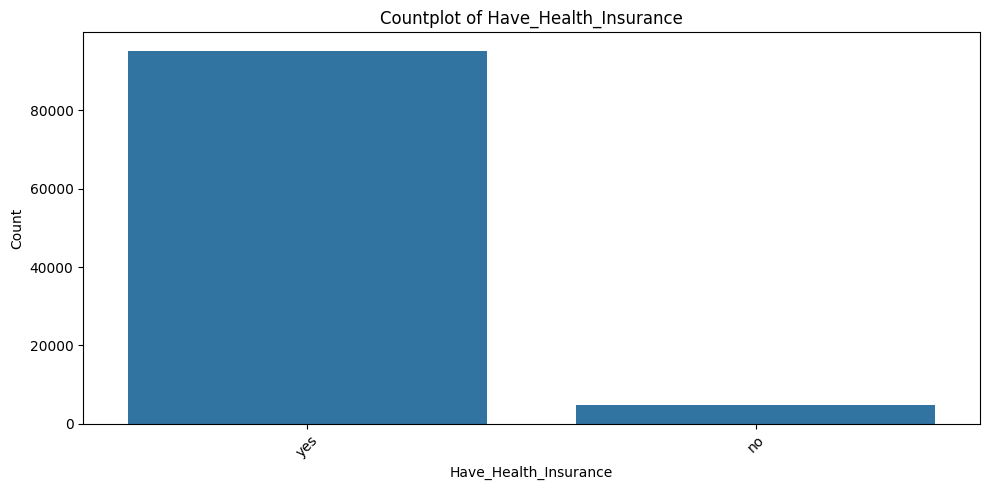

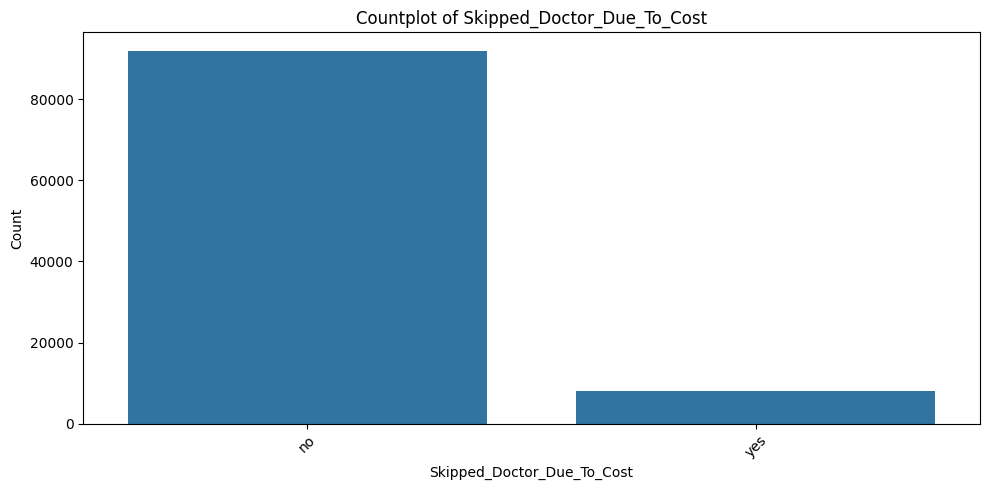

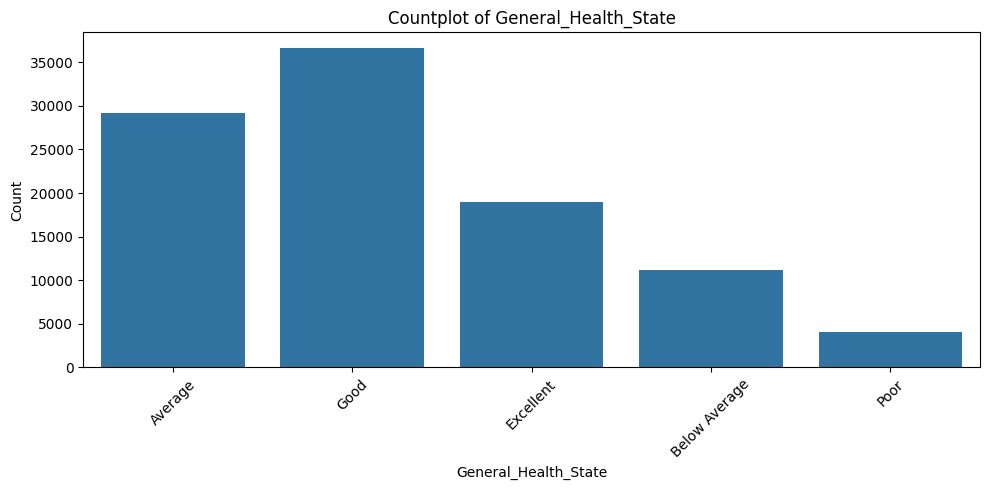

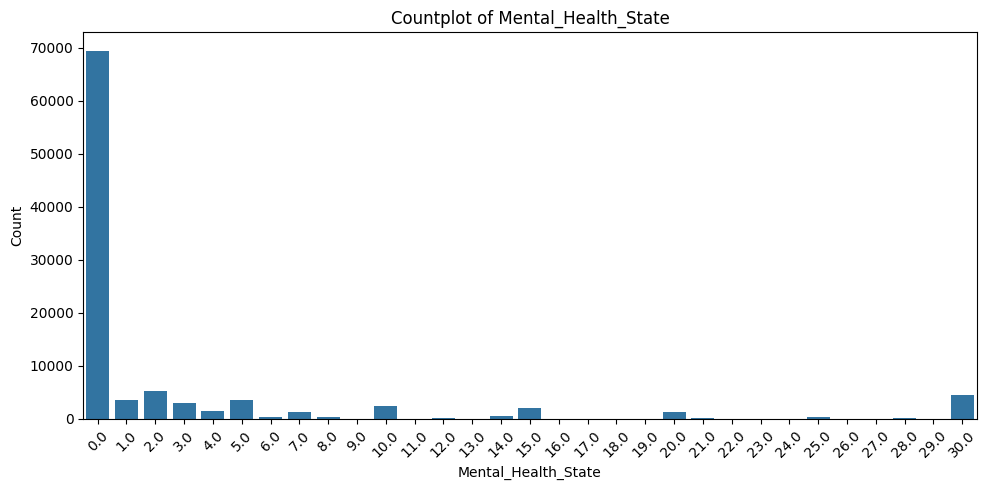

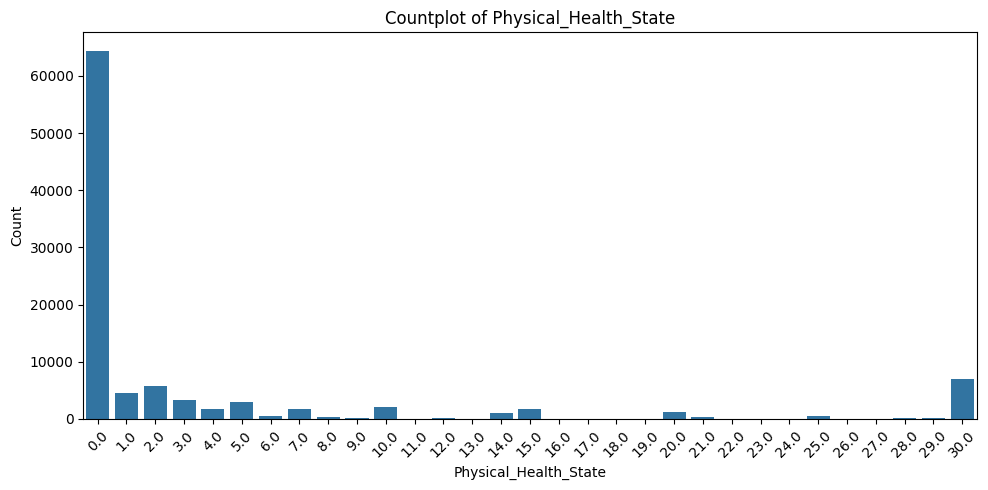

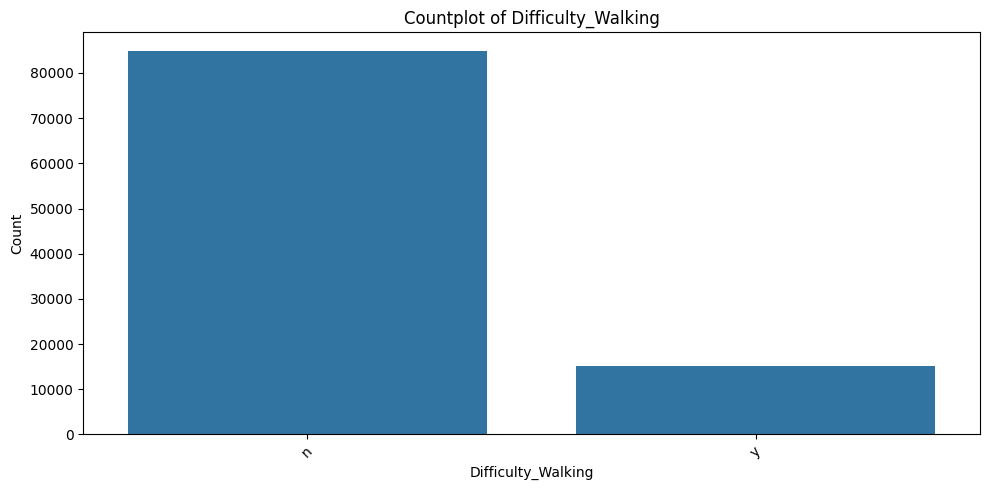

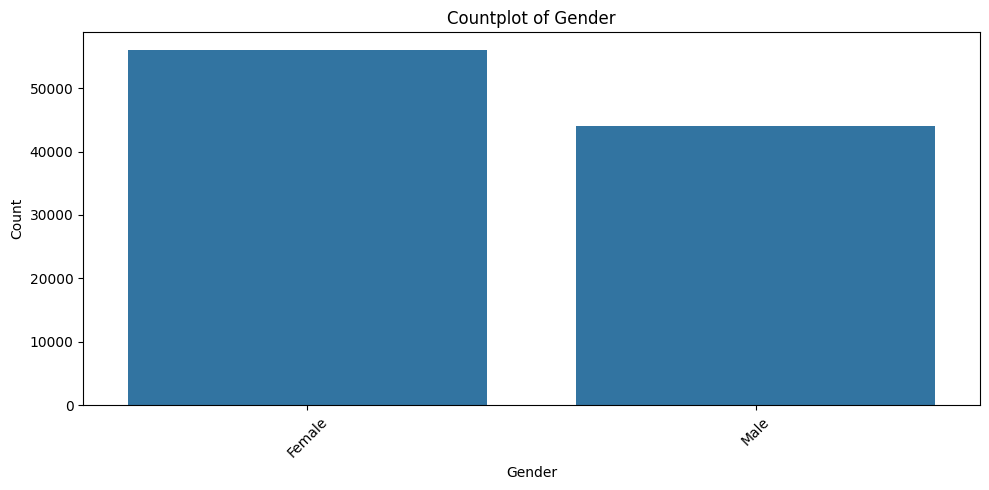

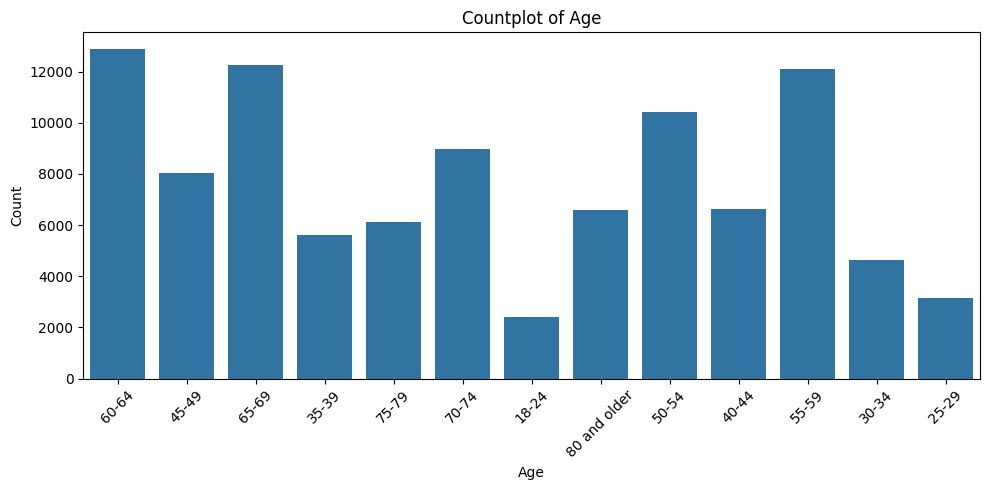

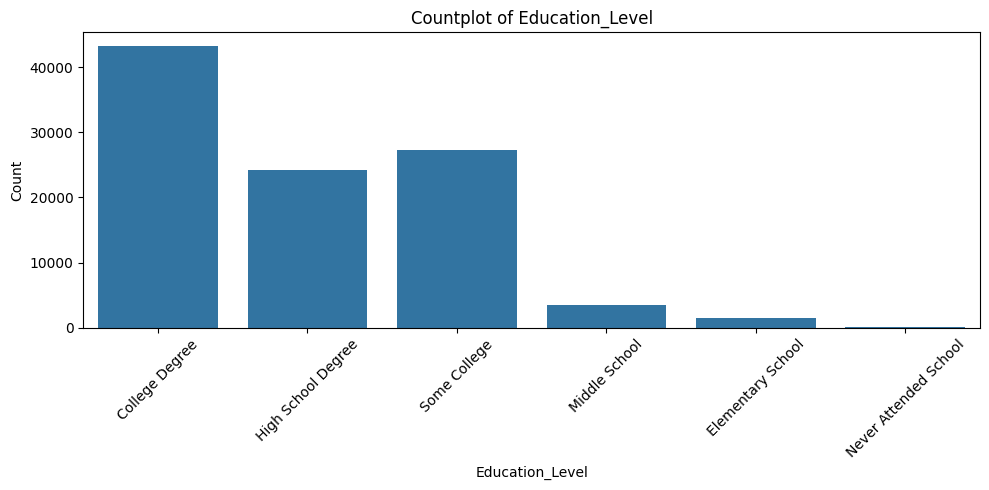

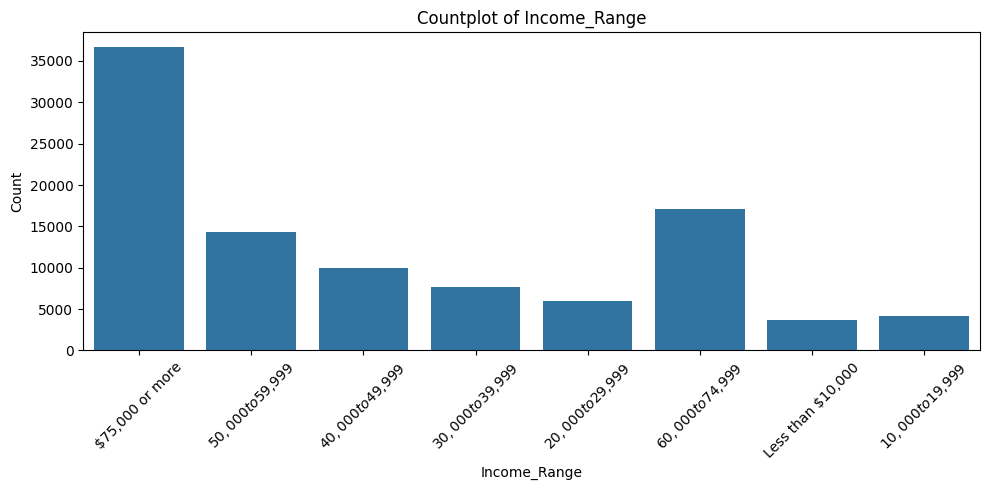

In [14]:
# 3. Countplots for selected categorical variables
categorical_features = [
    "High_BP", "High_Chol", "Chol_Checked", "Smoker", "Had_Stroke",
    "Have_Heart_Disease", "Physically_Active", "Eat_Fruits", "Eat_Veggies",
    "Heavy_Drinker", "Have_Health_Insurance", "Skipped_Doctor_Due_To_Cost",
    "General_Health_State", "Mental_Health_State", "Physical_Health_State",
    "Difficulty_Walking", "Gender", "Age", "Education_Level", "Income_Range"
]

for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

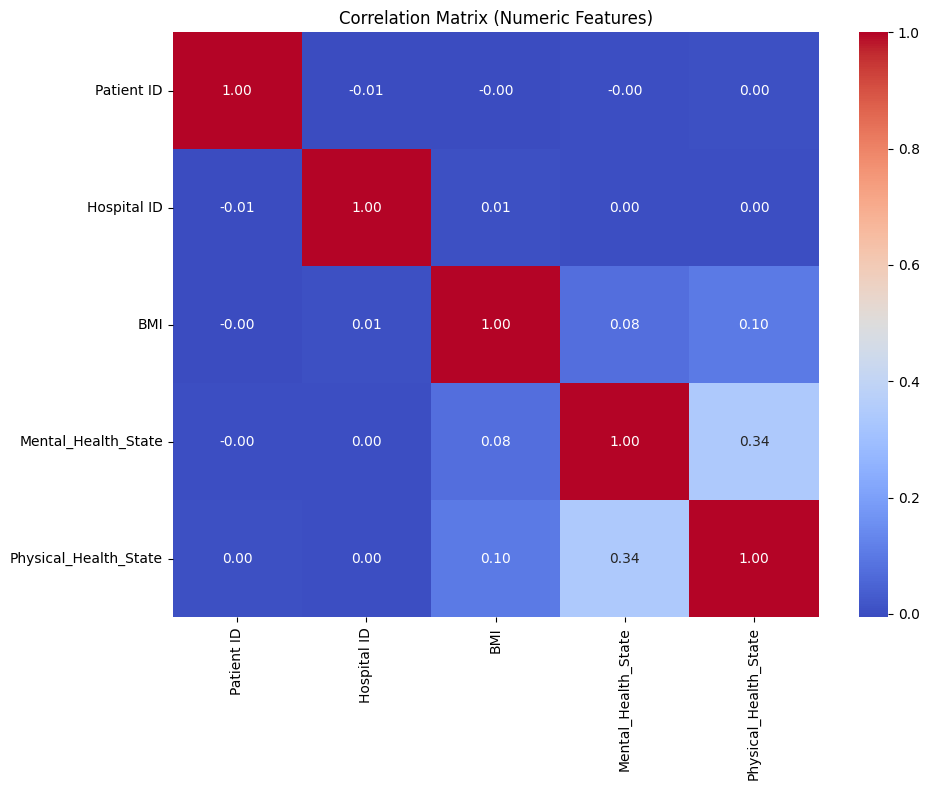

In [15]:
# 4. Correlation matrix for numeric columns (e.g., BMI)
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix (Numeric Features)")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns available for correlation matrix analysis.")

In [20]:
# Generate summary statistics for numeric columns
df.describe()

,Patient ID,Hospital ID,BMI,Mental_Health_State,Physical_Health_State
count,99978.000000,99978.000000,99843.000000,99920.000000,99864.000000
mean,500259.450659,53719.951479,28.108160,3.086599,3.941160
std,230741.171612,24617.530451,6.458825,7.281592,8.413652
min,100002.000000,13391.000000,12.000000,0.000000,0.000000
25%,300366.500000,38684.000000,24.000000,0.000000,0.000000
50%,501856.500000,53219.000000,27.000000,0.000000,0.000000
75%,699995.750000,75673.000000,31.000000,2.000000,3.000000
max,899989.000000,92451.000000,98.000000,30.000000,30.000000


In [21]:
# Generate summary statistics for numeric columns in transposed format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient ID,99978.0,500259.450659,230741.171612,100002.0,300366.5,501856.5,699995.75,899989.0
Hospital ID,99978.0,53719.951479,24617.530451,13391.0,38684.0,53219.0,75673.00,92451.0
BMI,99843.0,28.108160,6.458825,12.0,24.0,27.0,31.00,98.0
Mental_Health_State,99920.0,3.086599,7.281592,0.0,0.0,0.0,2.00,30.0
Physical_Health_State,99864.0,3.941160,8.413652,0.0,0.0,0.0,3.00,30.0


### Visualize data using Pandas

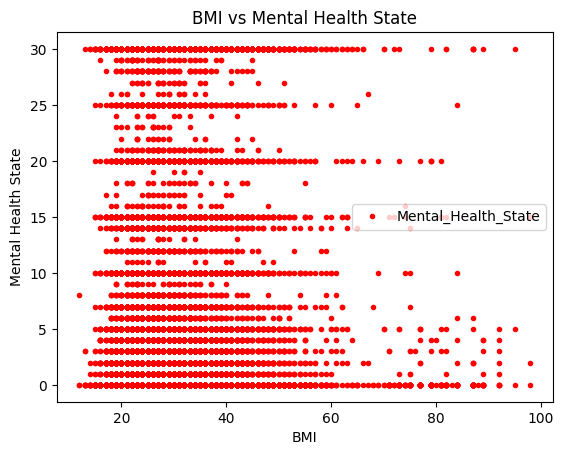

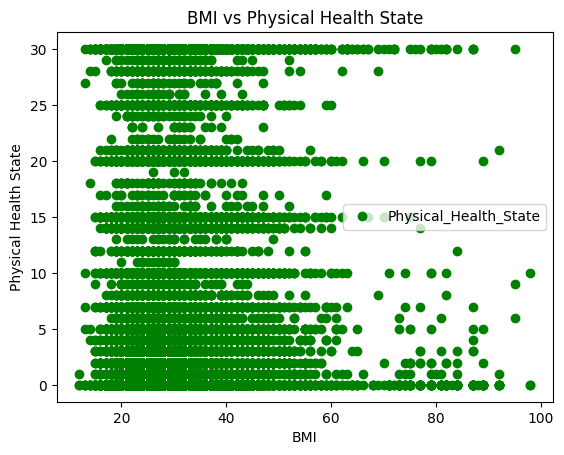

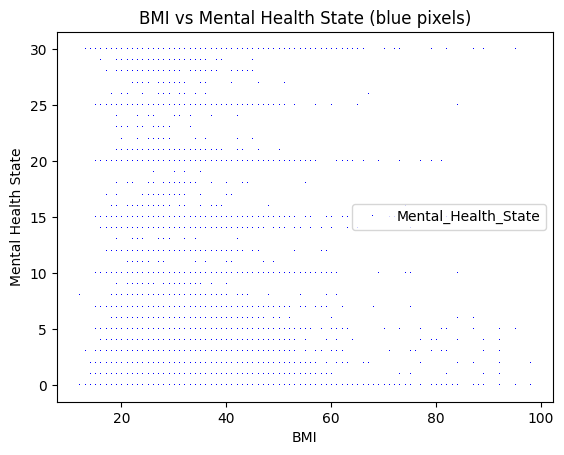

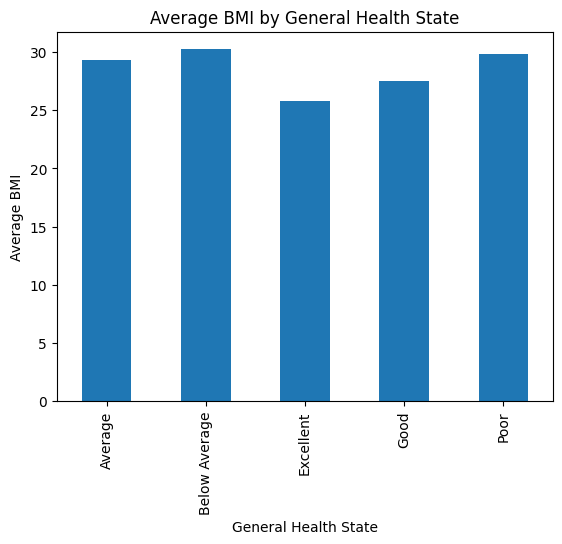

In [21]:
# Scatter plot: BMI vs Mental Health State (red points)
df.plot(x='BMI', y='Mental_Health_State', style='r.')
plt.title('BMI vs Mental Health State')
plt.xlabel('BMI')
plt.ylabel('Mental Health State')
plt.show()

# Scatter plot: BMI vs Physical Health State (green circles)
df.plot(x='BMI', y='Physical_Health_State', style='go')
plt.title('BMI vs Physical Health State')
plt.xlabel('BMI')
plt.ylabel('Physical Health State')
plt.show()

# Scatter plot: BMI vs Mental Health State (blue pixels)
df.plot(x='BMI', y='Mental_Health_State', style='b,')
plt.title('BMI vs Mental Health State (blue pixels)')
plt.xlabel('BMI')
plt.ylabel('Mental Health State')
plt.show()

# Bar plot: Average BMI by General Health State
df.groupby('General_Health_State')['BMI'].mean().plot(kind='bar')
plt.title('Average BMI by General Health State')
plt.xlabel('General Health State')
plt.ylabel('Average BMI')
plt.show()



### Visualize data using Matplotlib

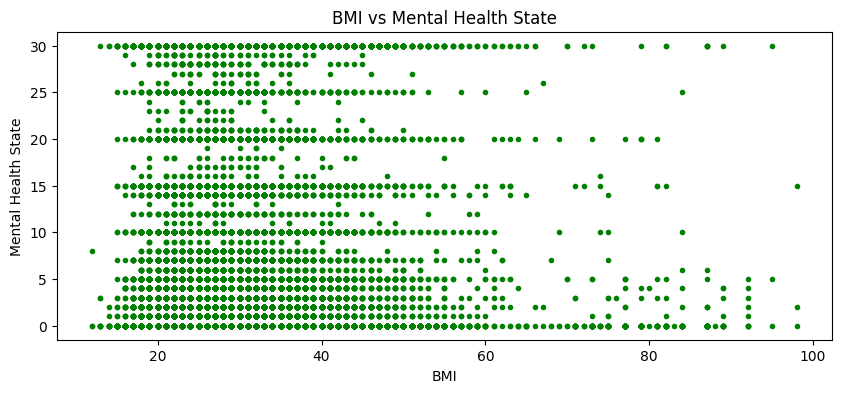

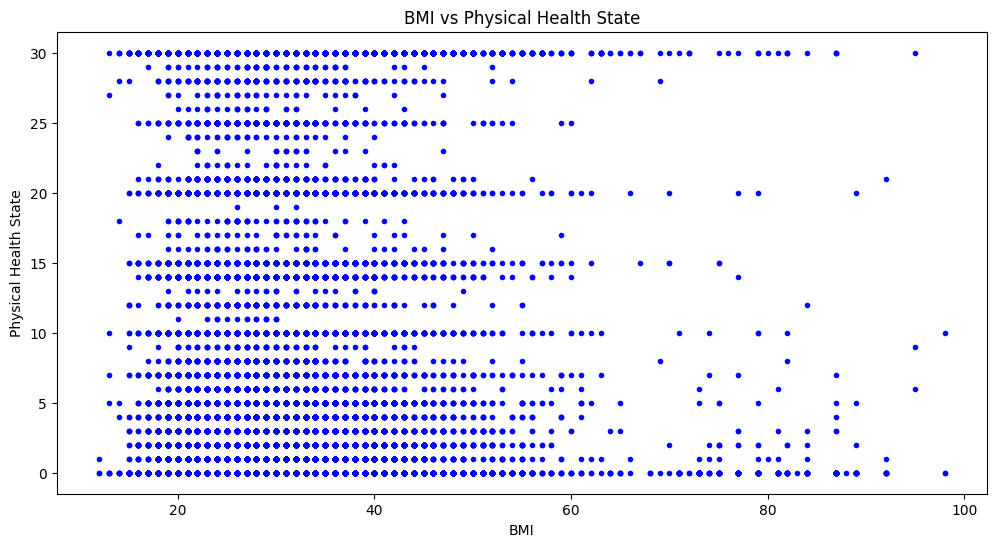

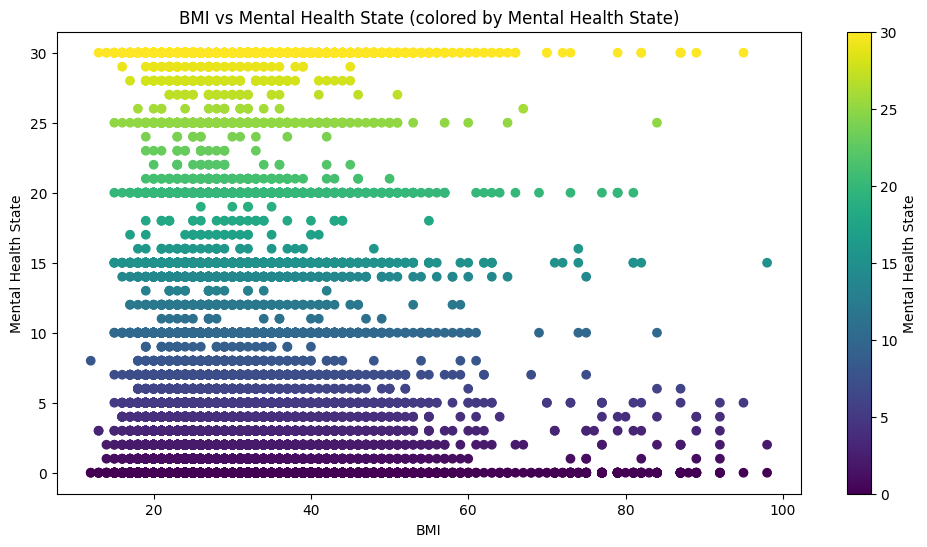

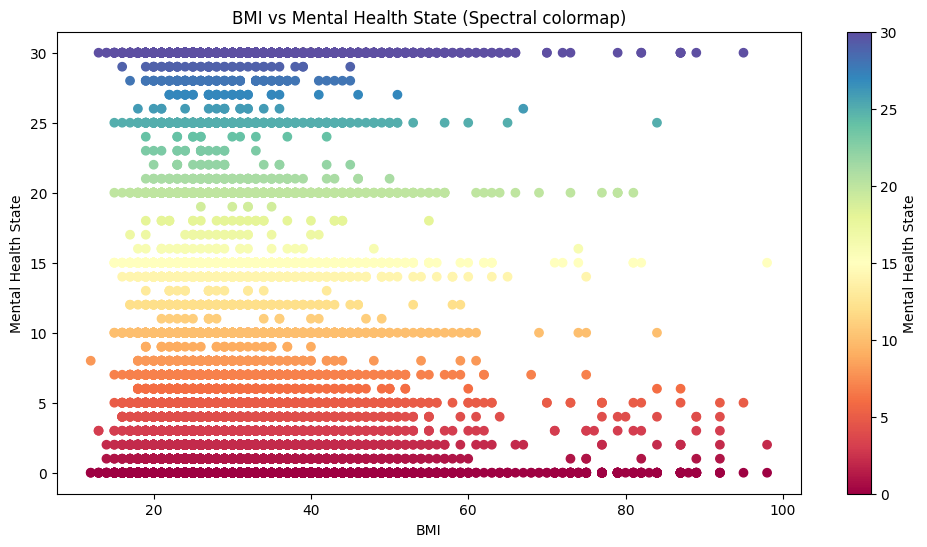

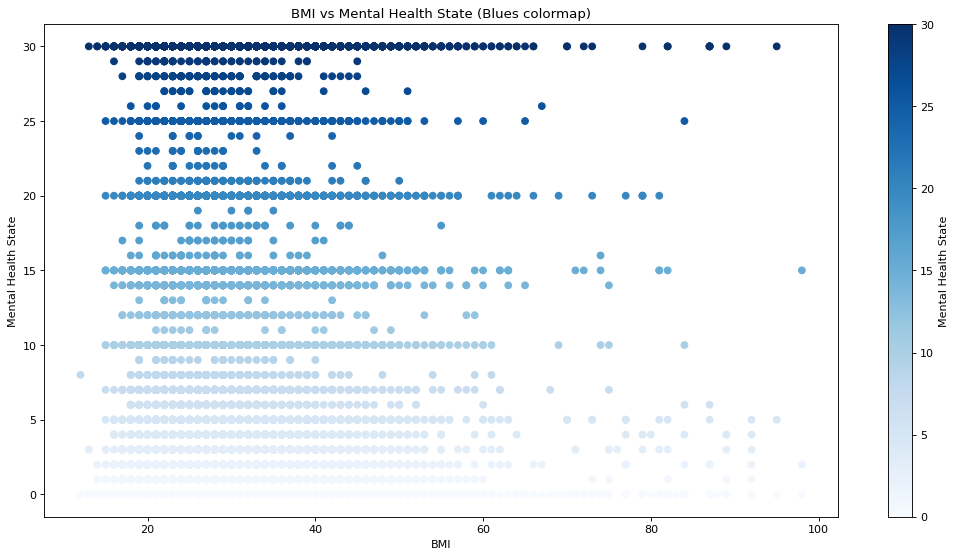

In [22]:
# Plot: BMI vs Mental Health State (green points)
plt.figure(figsize=(10, 4))
plt.plot(df['BMI'], df['Mental_Health_State'], 'g.')
plt.title('BMI vs Mental Health State')
plt.xlabel('BMI')
plt.ylabel('Mental Health State')
plt.show()

# Plot: BMI vs Physical Health State (blue points)
plt.figure(figsize=(12, 6))
plt.plot(df['BMI'], df['Physical_Health_State'], 'b.')
plt.title('BMI vs Physical Health State')
plt.xlabel('BMI')
plt.ylabel('Physical Health State')
plt.show()

# Scatter plot: BMI vs Mental Health State with default colormap
plt.figure(figsize=(12, 6))
plt.scatter(df['BMI'], df['Mental_Health_State'], c=df['Mental_Health_State'])
plt.colorbar(label='Mental Health State')
plt.title('BMI vs Mental Health State (colored by Mental Health State)')
plt.xlabel('BMI')
plt.ylabel('Mental Health State')
plt.show()

# Scatter plot: BMI vs Mental Health State with diverging colormap 'Spectral'
plt.figure(figsize=(12, 6))
plt.scatter(df['BMI'], df['Mental_Health_State'], c=df['Mental_Health_State'], cmap='Spectral')
plt.colorbar(label='Mental Health State')
plt.title('BMI vs Mental Health State (Spectral colormap)')
plt.xlabel('BMI')
plt.ylabel('Mental Health State')
plt.show()

# Scatter plot: BMI vs Mental Health State with sequential colormap 'Blues'
plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(df['BMI'], df['Mental_Health_State'], c=df['Mental_Health_State'], cmap='Blues')
plt.colorbar(label='Mental Health State')
plt.title('BMI vs Mental Health State (Blues colormap)')
plt.xlabel('BMI')
plt.ylabel('Mental Health State')
plt.show()

### Visualize data using Seaborn

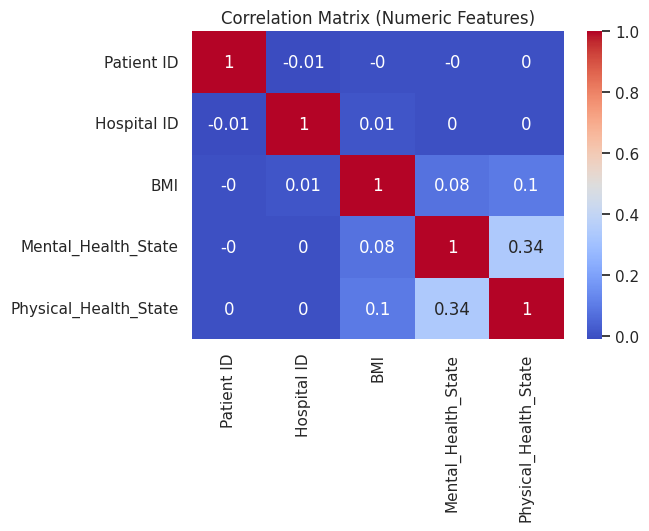

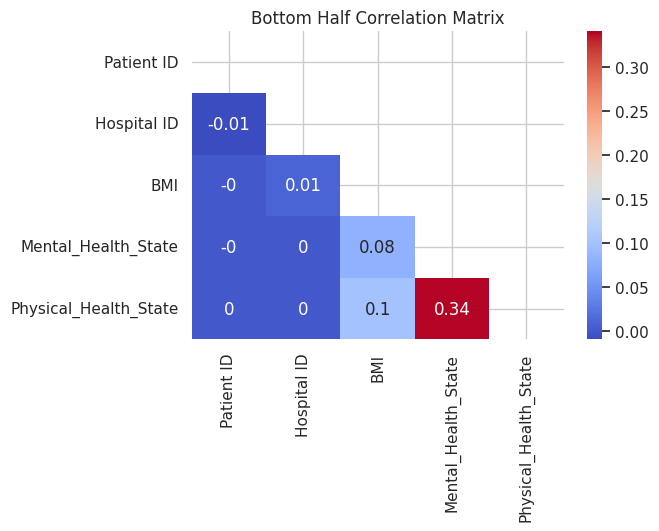

<ipython-input-24-bf659450f059>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Have_Diabetes', data=df, palette='pastel')


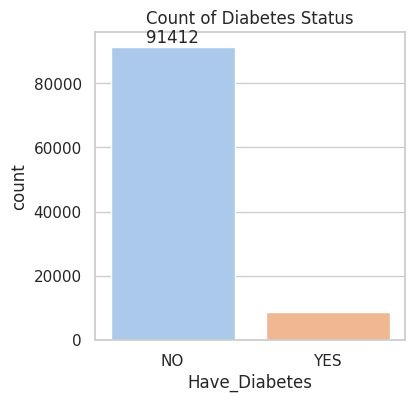

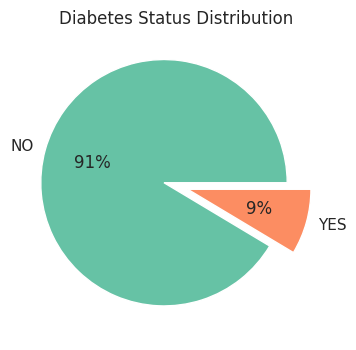

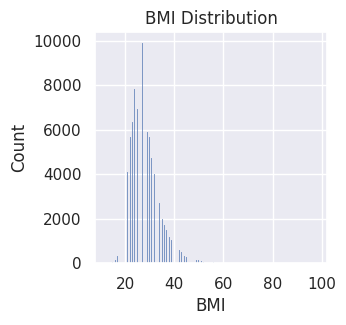

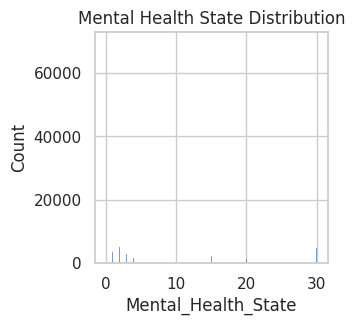

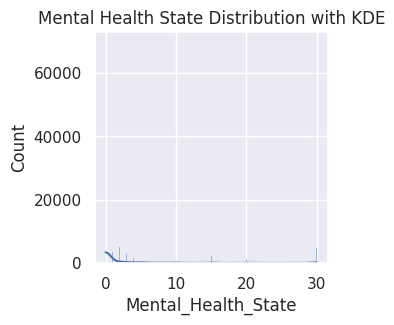

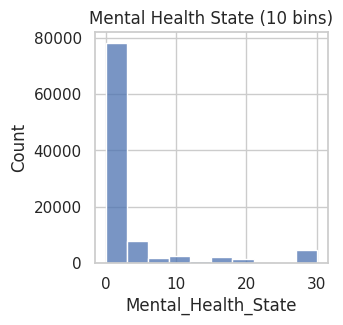

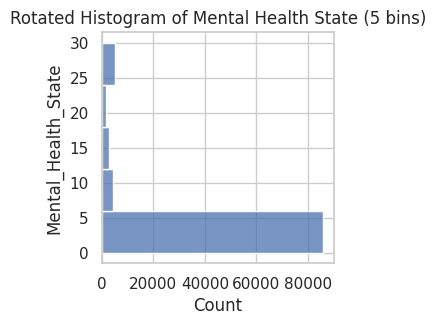

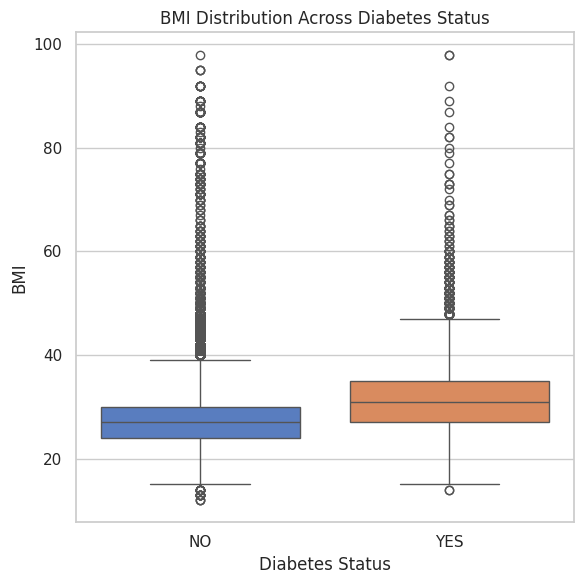

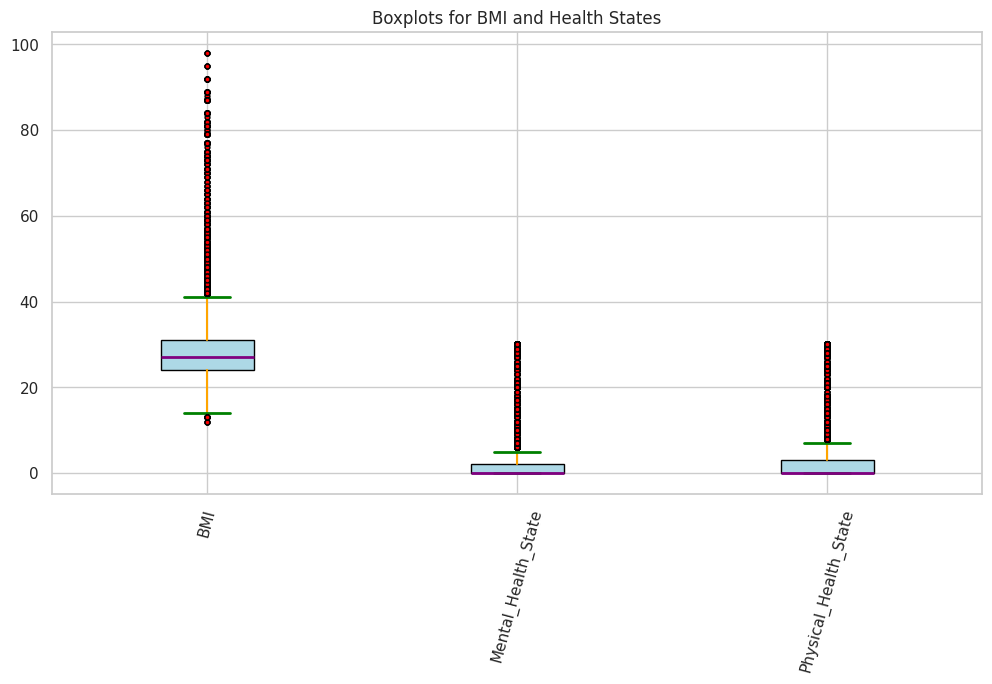

In [24]:
# ----- Correlation Matrix -----
plt.figure(figsize=(6, 4))
# Calculate correlations among numeric columns (e.g., BMI, Mental/Physical Health State)
correlation_matrix = df.corr(numeric_only=True).round(2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

# Display only the bottom half of the correlation matrix
plt.figure(figsize=(6, 4))
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm')
plt.title('Bottom Half Correlation Matrix')
plt.show()

# ----- Count Plot -----
plt.figure(figsize=(4, 4))
# Example: Countplot for binary "Have_Diabetes"
ax = sns.countplot(x='Have_Diabetes', data=df, palette='pastel')
ax.bar_label(ax.containers[0])
plt.title('Count of Diabetes Status')
plt.show()

# ----- Pie Chart -----
# Pie chart for distribution of "Have_Diabetes"
diabetes_counts = df['Have_Diabetes'].value_counts()
HD_counts = list(diabetes_counts.values)
HD_labels = list(diabetes_counts.index)
wedge_setting = 0.1
explode_settings = tuple([wedge_setting for _ in HD_counts])
plt.figure(figsize=(4, 4))
plt.pie(HD_counts, labels=HD_labels, explode=explode_settings, autopct='%0.0f%%',
        colors=sns.color_palette('Set2'), startangle=0, labeldistance=1.1)
plt.title('Diabetes Status Distribution')
plt.show()

# ----- Histograms -----
# Histogram of BMI
plt.figure(figsize=(3, 3))
sns.set(style="darkgrid")
sns.histplot(data=df, x='BMI')
plt.title('BMI Distribution')
plt.show()

# Histogram of Mental Health State
plt.figure(figsize=(3, 3))
sns.set(style="whitegrid")
sns.histplot(data=df, x='Mental_Health_State')
plt.title('Mental Health State Distribution')
plt.show()

# Histogram of Mental Health State with KDE overlay
plt.figure(figsize=(3, 3))
sns.set(style="darkgrid")
sns.histplot(data=df, x='Mental_Health_State', kde=True)
plt.title('Mental Health State Distribution with KDE')
plt.show()

# Histogram of Mental Health State (10 bins)
plt.figure(figsize=(3, 3))
sns.set(style="whitegrid")
sns.histplot(data=df, x='Mental_Health_State', bins=10)
plt.title('Mental Health State (10 bins)')
plt.show()

# Rotated histogram of Mental Health State (5 bins)
plt.figure(figsize=(3, 3))
sns.set(style="whitegrid")
sns.histplot(data=df, y='Mental_Health_State', bins=5)
plt.title('Rotated Histogram of Mental Health State (5 bins)')
plt.show()

# ----- Box Plot -----
# Boxplot: BMI across different Diabetes statuses
plt.figure(figsize=(6, 6))
sns.boxplot(x='Have_Diabetes', y='BMI', data=df, palette='muted', hue='Have_Diabetes')
plt.title('BMI Distribution Across Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

# Boxplot for selected numeric columns
plt.figure(figsize=(12, 6))
df.boxplot(['BMI', 'Mental_Health_State', 'Physical_Health_State'],
           patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           whiskerprops=dict(color='orange', linewidth=1.5),
           capprops=dict(color='green', linewidth=2),
           flierprops=dict(markerfacecolor='red', marker='.', markersize=7),
           medianprops=dict(color='purple', linewidth=2))
plt.xticks(rotation=75)
plt.title('Boxplots for BMI and Health States')
plt.show()

#### SIDE BY SIDE PLOTS



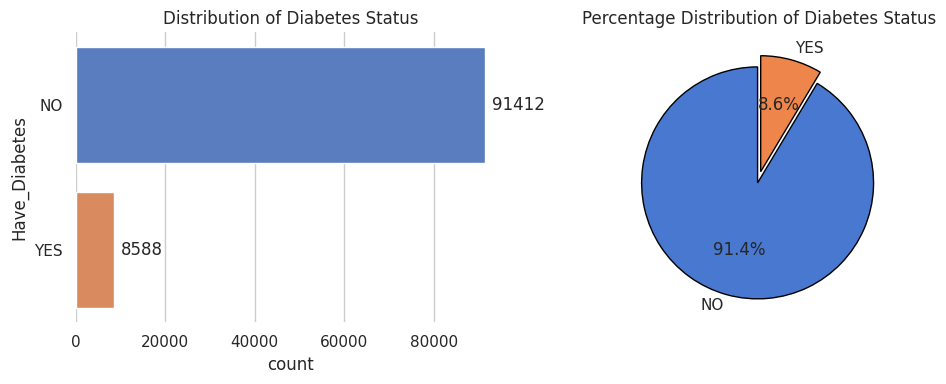

In [25]:
plt.figure(figsize=(10, 4))
# Subplot 1: Count plot for Diabetes status (horizontal)
plt.subplot(1, 2, 1)
sns.countplot(y='Have_Diabetes', data=df, hue='Have_Diabetes', palette='muted', dodge=False)
plt.title('Distribution of Diabetes Status')
ax = plt.gca()
for p in ax.patches:
    count = int(p.get_width())
    ax.annotate(f'{count}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
sns.despine(left=True, bottom=True)
plt.legend([], [], frameon=False)

# Subplot 2: Pie chart for Diabetes distribution
plt.subplot(1, 2, 2)
diabetes_counts.plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('muted'),
    startangle=90,
    explode=[0.05] * len(diabetes_counts),
    wedgeprops={'edgecolor': 'black'},
)
plt.title('Percentage Distribution of Diabetes Status')
plt.ylabel('')
plt.tight_layout()
plt.show()


#### UNIVARIATE ANALYSIS FOR NUMERIC COLUMNS

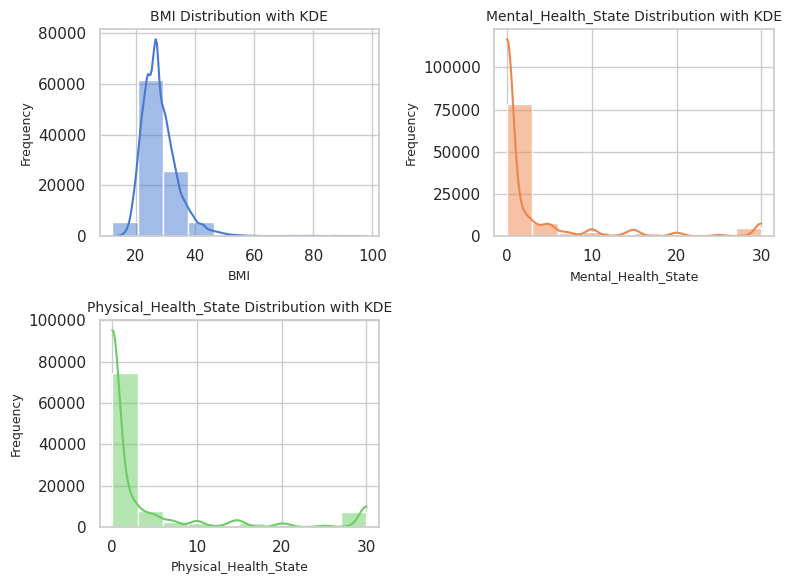

In [26]:
def univariate_analysis(data, columns):
    plt.figure(figsize=(8, 6))
    muted_colors = sns.color_palette("muted", len(columns))
    # Arrange subplots in a grid (adjust rows/cols as needed)
    for i, column in enumerate(columns):
        plt.subplot(2, 2, i + 1)
        sns.histplot(data[column], kde=True, bins=10, color=muted_colors[i])
        plt.title(f'{column} Distribution with KDE', fontsize=10)
        plt.xlabel(column, fontsize=9)
        plt.ylabel('Frequency', fontsize=9)
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['BMI', 'Mental_Health_State', 'Physical_Health_State']
univariate_analysis(df, columns_to_analyze)


#### Box Plots

<ipython-input-28-a23585c1ef20>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Have_Diabetes', y=feature, data=df, palette='muted')
<ipython-input-28-a23585c1ef20>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Have_Diabetes', y=feature, data=df, palette='muted')
<ipython-input-28-a23585c1ef20>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Have_Diabetes', y=feature, data=df, palette='muted')


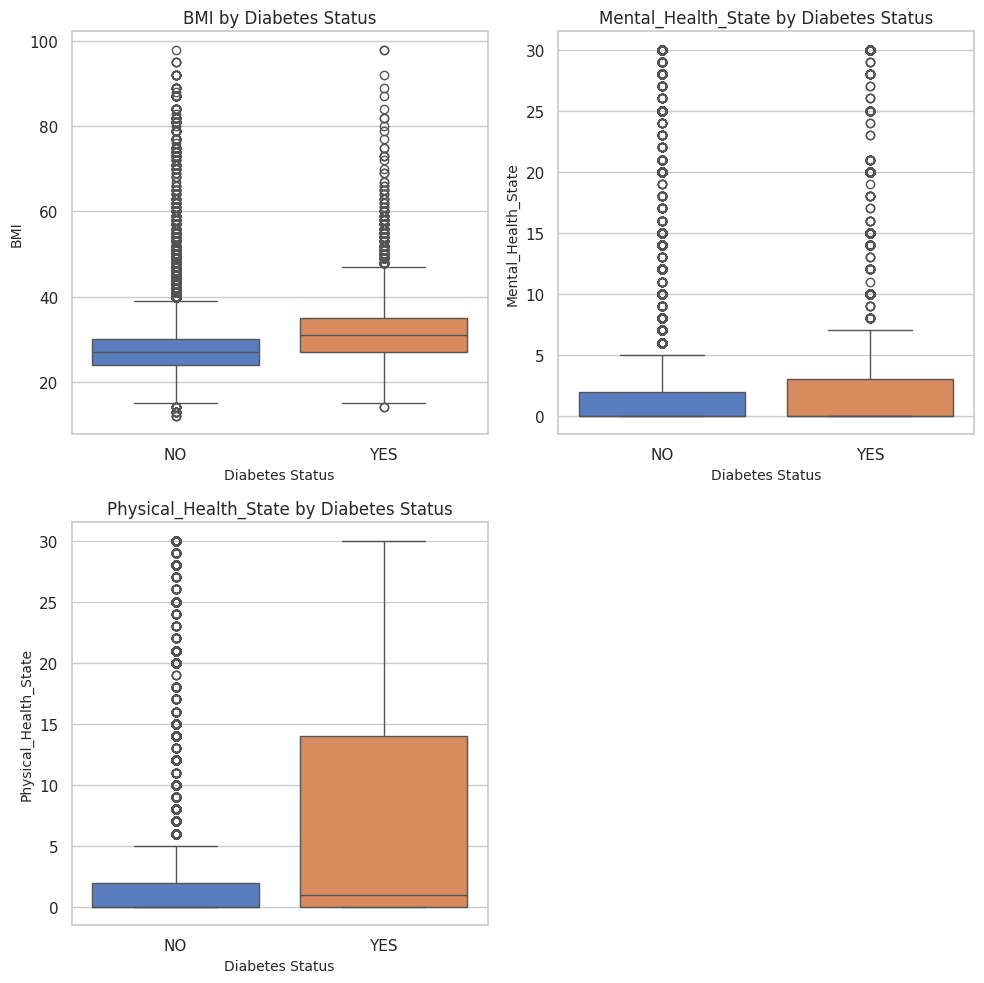

In [28]:
numerical_features = ['BMI', 'Mental_Health_State', 'Physical_Health_State']
plt.figure(figsize=(10, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Have_Diabetes', y=feature, data=df, palette='muted')
    plt.title(f'{feature} by Diabetes Status')
    plt.xlabel('Diabetes Status', fontsize=10)
    plt.ylabel(feature, fontsize=10)
plt.tight_layout()
plt.show()


#### Pie Charts: Compare General Health State Distributions by Diabetes Status

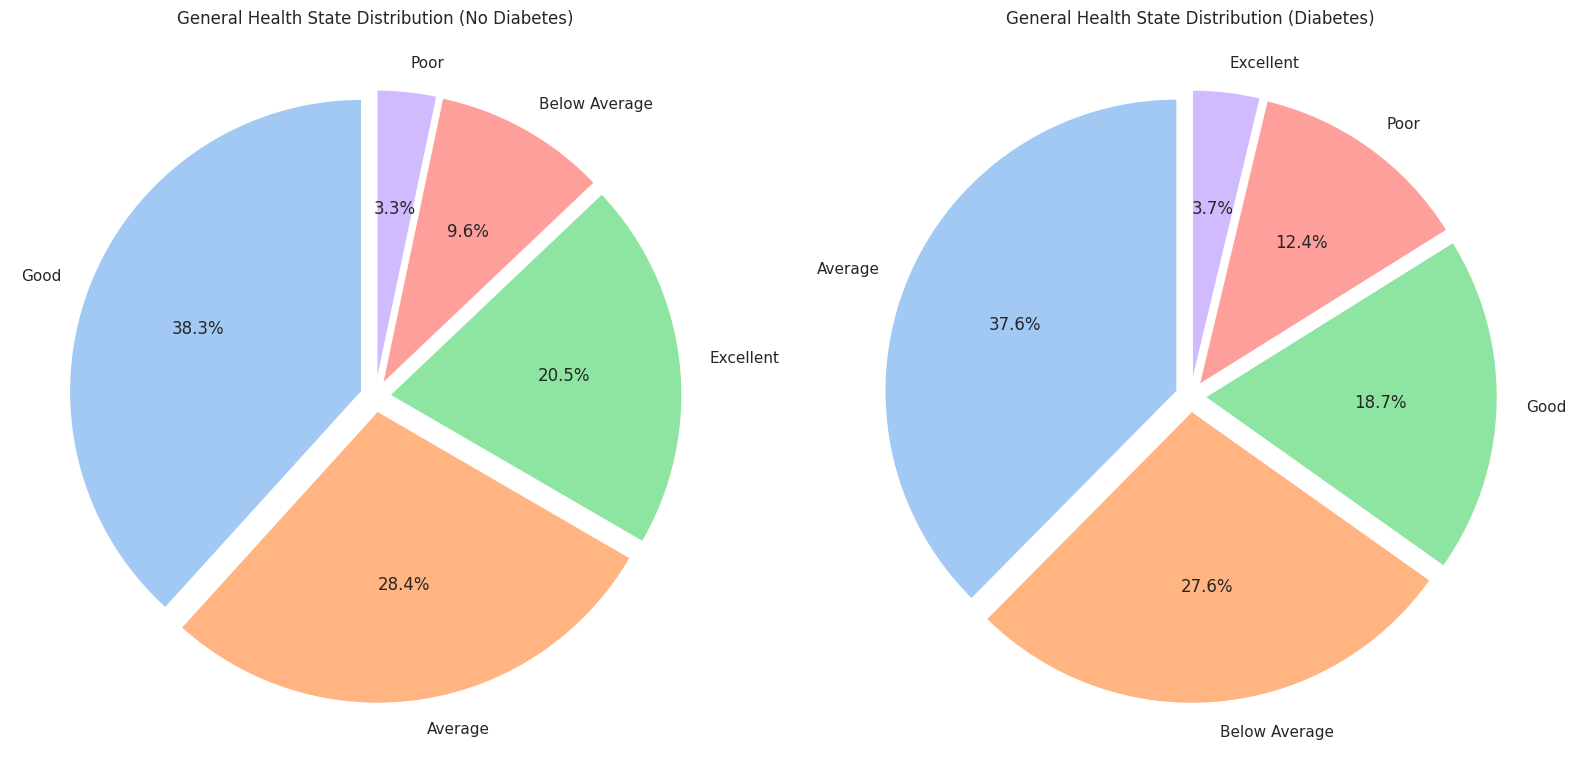

In [29]:
# Separate the data by diabetes status
no_diabetes = df[df['Have_Diabetes'] == 'NO']
yes_diabetes = df[df['Have_Diabetes'] == 'YES']

# Count distribution for General Health State in each group
no_diab_health_counts = no_diabetes['General_Health_State'].value_counts()
yes_diab_health_counts = yes_diabetes['General_Health_State'].value_counts()

plt.figure(figsize=(16, 8))

# Pie chart for patients without diabetes
plt.subplot(1, 2, 1)
no_diab_health_counts.plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90,
    explode=[0.05] * len(no_diab_health_counts),
    labels=no_diab_health_counts.index
)
plt.title('General Health State Distribution (No Diabetes)')
plt.ylabel('')

# Pie chart for patients with diabetes
plt.subplot(1, 2, 2)
yes_diab_health_counts.plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90,
    explode=[0.05] * len(yes_diab_health_counts),
    labels=yes_diab_health_counts.index
)
plt.title('General Health State Distribution (Diabetes)')
plt.ylabel('')

plt.tight_layout()
plt.show()